#    
# <center> <font color='red'> A Primer on the Optimal Control Problems  </font> </center>

### <center> [D Bhanu Prakash](https://dbhanuprakash233.github.io)

### <center> [dbhanuprakash233@gmail.com](dbhanuprakash233@gmail.com)

# An Optimal Control Problem

We aim to minimize the cost functional:

$$
J(u) = \int_0^T \left( x(t)^2 + u(t)^2 \right) \, dt
$$

Subject to the system dynamics:

$$
\color{red}{\dot{x}(t) = Ax(t) + Bu(t)}, \quad x(0) = x_0
$$

---

## 🎯 Goal

Choose the control $ \color{red}{u(t)} $ such that the cost $ J(u) $ is minimized.

---

###  <center> <font color='red'>  5 step solution for system of ordinary differential equations </font> </center>

#### Model Equations

$$
\frac{dH}{dt} = rH\left(1 - \frac{H}{k}\right) - \frac{aHL}{c + H}  \\
\frac{dL}{dt} = a \frac{bHL}{c + H} - d*L
$$

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

### Programming and Plotting

####  Step 1: Initialization

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Step 2: Default Parameter Values

In [ ]:
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

#### Step 3: Define the differential equations

In [ ]:
def deriv(t, y):
    H, L = y
    dHdt =  r*H*(1-H/k) - a*H*L/(c+H)
    dLdt = b*a*H*L/(c+H) - d*L
    return [dHdt, dLdt]

####  Step 4: Integrate Differential Equations

In [ ]:
t = np.linspace(0, 70, 500)                             # time grid
IC = [20, 20]                                           # initial conditions for H and L
soln = solve_ivp(deriv, (t[0], t[-1]), IC, t_eval=t)    # compute solution
H, L = soln.y                                           # unpack solution

####  Step 5: Plot

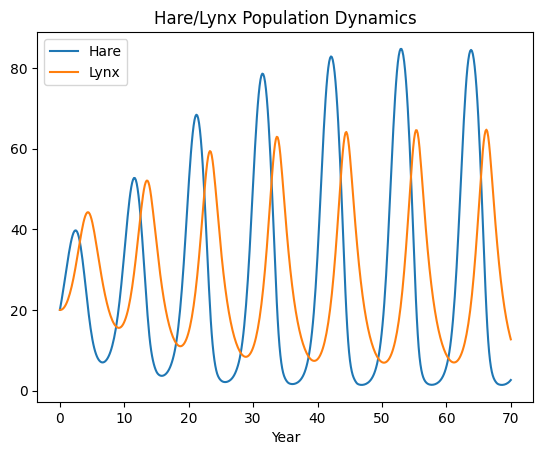

In [ ]:
plt.plot(t, H, t,  L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare', 'Lynx'])

If you have more than one thing to plot, we can make use of the subplot feature

Text(0.5, 0, 'Hare')

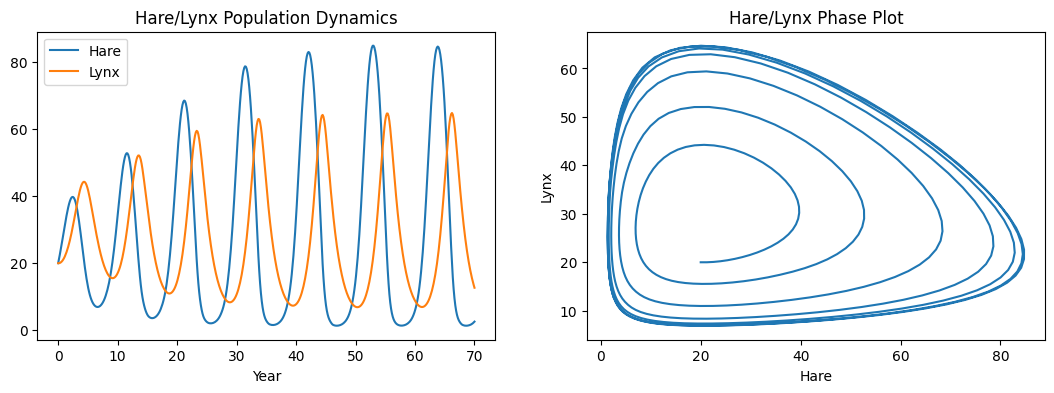

In [ ]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(t, H, t, L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare', 'Lynx'])

plt.subplot(1, 2, 2)
plt.plot(H, L)
plt.title('Hare/Lynx Phase Plot')
plt.ylabel('Lynx')
plt.xlabel('Hare')

Here, we used **solve_ivp** method. It is one of the many possible methods to solve a system of ordinary differential equations. Every method has it's own advantages and disadvantages. We will see about many other methods like **odeint**, coded **Euler** and coded **RK4** in the next notebook.

Assignment 1: Extend 2D system to the following 3D system

$$\left\{ \begin{array}{ll}
\displaystyle \frac{\mathrm{d}S}{\mathrm{d}t} &= -\displaystyle \frac{\beta S}{N} I,\\[4mm]
\displaystyle \frac{\mathrm{d}I}{\mathrm{d}t} &= \displaystyle \frac{\beta S}{N} I - \gamma I,\\[4mm]
\displaystyle\frac{\mathrm{d}R}{\mathrm{d}t} &= \displaystyle \gamma I.
\end{array} \right.$$

Assignment 2: Using Forward-Backward Sweep Method, Solve

\begin{align*}
    &\min_u \int_0^T u(t) dt \\
    \text{subject to } & x_1 '(t) = x_2(t), \\
    &x_2 '(t) = - g + \frac{v_e}{m} u(t), \\
    & x_1(T) = 0, \ x_2(T) = 0,
\end{align*}

## Extend 2D system to 3D system

$$\left\{ \begin{array}{ll}
\displaystyle \frac{\mathrm{d}S}{\mathrm{d}t} &= -\displaystyle \frac{\beta S}{N} I,\\[4mm]
\displaystyle \frac{\mathrm{d}I}{\mathrm{d}t} &= \displaystyle \frac{\beta S}{N} I - \gamma I,\\[4mm]
\displaystyle\frac{\mathrm{d}R}{\mathrm{d}t} &= \displaystyle \gamma I.
\end{array} \right.$$

We pose

$$
X = \begin{pmatrix} S \\
I \\
R \end{pmatrix}
$$


And we write our differential system so:  

$$
\dot{X} =
\begin{pmatrix} \displaystyle -\frac{\beta S}{N} I\\
\displaystyle \frac{\beta S}{N} I - \gamma I \\
\gamma I
\end{pmatrix}
= f\left(X\right)
$$

In [ ]:
import matplotlib as mpl
import pandas as pd
from scipy.integrate import odeint
import numba
from scipy.optimize import root_scalar
%matplotlib inline

In [ ]:
N = 350. #Total number of individuals, N
I0, R0 = 1., 0 #Initial number of infected and recovered individuals
S0 = N - I0 - R0 #Susceptible individuals to infection initially is deduced
beta, gamma = 0.4, 0.1 #Contact rate and mean recovery rate
t = np.linspace(0, 160, 161)

In [ ]:
def derivative(X, t):
    S, I, R = X
    dotS = -beta * S * I / N
    dotI = beta * S * I / N - gamma * I
    dotR = gamma * I
    return np.array([dotS, dotI, dotR])

In [ ]:
X0 = S0, I0, R0 #Initial conditions vector
res = odeint(derivative, X0, t)
S, I, R = res.T

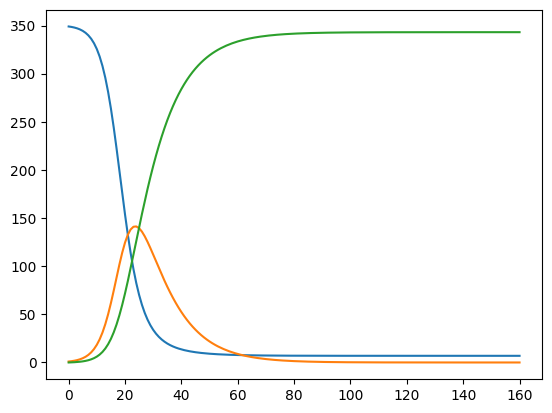

In [ ]:
plt.plot(t,S)
plt.plot(t,I)
plt.plot(t,R)
plt.show()

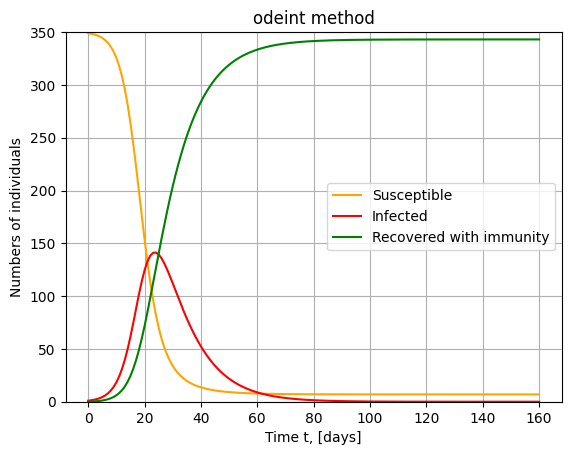

In [ ]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();

## Euler approach

In [ ]:
def Euler(func, X0, t):
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

In [ ]:
Nt = 100
Xe = Euler(derivative, X0, t)

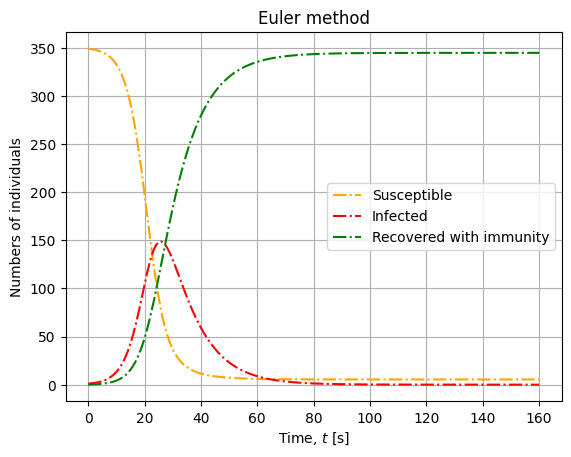

In [ ]:
plt.figure()

plt.title("Euler method")
plt.plot(t, Xe[:,0], color = 'orange', linestyle = '-.', label='Susceptible')
plt.plot(t, Xe[:,1], 'r-.', label='Infected')
plt.plot(t, Xe[:,2], 'g-.', label='Recovered with immunity')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")

plt.show();

## Comparing of both approaches

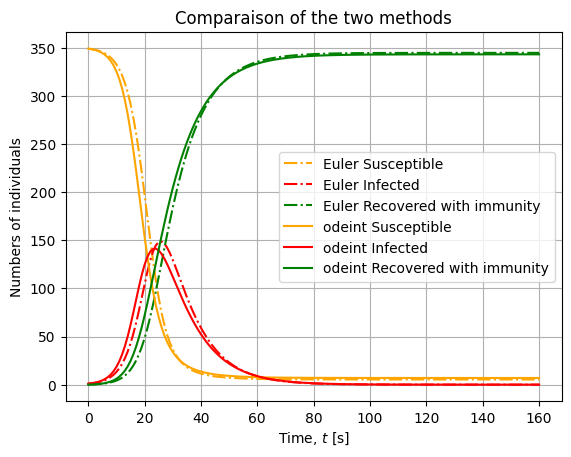

In [ ]:
plt.figure()

plt.plot(t, Xe[:,0], color = 'orange', linestyle = '-.', label='Euler Susceptible')
plt.plot(t, Xe[:,1], 'r-.', label='Euler Infected')
plt.plot(t, Xe[:,2], 'g-.', label='Euler Recovered with immunity')
plt.plot(t, S, 'orange', label='odeint Susceptible')
plt.plot(t, I, 'r', label='odeint Infected')
plt.plot(t, R, 'g', label='odeint Recovered with immunity')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")
plt.title("Comparaison of the two methods")
plt.show();

## With RK4

In [ ]:
def RK4(func, X0, t):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i])
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2.)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2.)
        k4 = func(X[i] + dt    * k3, t[i] + dt)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

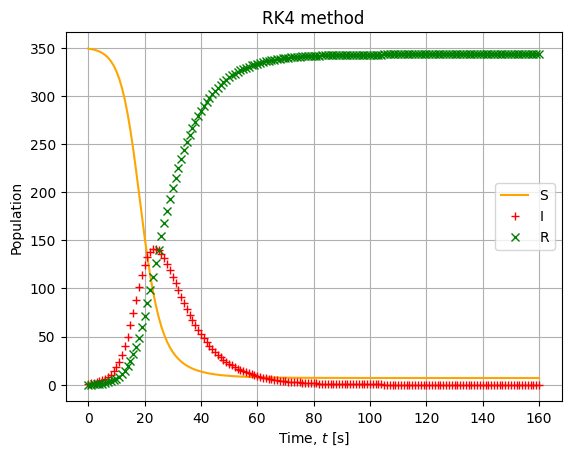

In [ ]:
Xrk4 = RK4(derivative, X0, t)
plt.figure()
plt.title("RK4 method")
plt.plot(t, Xrk4[:, 0], 'orange', label = 'S')
plt.plot(t, Xrk4[:, 1], '+r', label = "I")
plt.plot(t, Xrk4[:, 2], 'xg', label = 'R')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

plt.show();

For models with high nonlinearity, it is advisable to use RK4 method instead of default methods to avoid rounding and chopping errors.

#     
#  <center> <font color='red'>  Forward Backward Sweep Method </font> </center>

Given the optimal control problem:
\begin{align*}
    &\min_u \int_0^T u(t) \, dt \\
    \text{subject to } & x_1'(t) = x_2(t), \\
    &x_2'(t) = -g + \frac{v_e}{m} u(t), \\
    &x_1(0) = x_{10}, \quad x_2(0) = x_{20},
\end{align*}

The Hamiltonian is:

$$
H(x_1, x_2, u, \lambda_1, \lambda_2) = u + \lambda_1 x_2 + \lambda_2 \left( -g + \frac{v_e}{m} u \right)$$


$$
H(x_1, x_2, u, \lambda_1, \lambda_2) = u \left( 1 + \frac{v_e}{m} \lambda_2 \right)+ \lambda_1 x_2 - \lambda_2 g $$

The adjoint equations are:

\begin{align*}
    \lambda_1'(t) &= -\frac{\partial H}{\partial x_1} = 0, \\
    \lambda_2'(t) &= -\frac{\partial H}{\partial x_2} = -\lambda_1(t) \\
    & \lambda_1(T) = 0, \quad \lambda_2(T) = 0.
\end{align*}


The optimality condition is:

$$
\frac{\partial H}{\partial u} = 1 + \lambda_2 \frac{v_e}{m} = 0
\quad \Rightarrow \quad \lambda_2 = -\frac{m}{v_e}
$$

It is independent of $u$. So H is increasing if $ \frac{\partial H}{\partial u} > 0$ and decreasing if $\frac{\partial H}{\partial u} < 0$.

The Hamiltonian Minimization condition is:

$$ u^*(t) = \arg\min_{u \in [0, u_{\max}]} H(x(t), u, \lambda(t)) $$


$$
u^*(t) =
\begin{cases}
0 & \text{if } 1 + \lambda_2 \frac{v_e}{m} > 0, \\
\text{any value in } [0, u_{\max}] & \text{if } \lambda_2(t) = -\dfrac{m}{v_e}, \\
u_{\max} & \text{if } 1 + \lambda_2 \frac{v_e}{m} < 0.
\end{cases}
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## The following data is for the [Apollo 11 Lunar Module](https://nssdc.gsfc.nasa.gov/nmc/spacecraft/display.action?id=1969-059C).

In [ ]:
# lunar module
m_ascent_dry = 2445.0          # kg mass of ascent stage without fuel
m_ascent_fuel = 2376.0         # kg mass of ascent stage fuel
m_descent_dry = 2034.0         # kg mass of descent stage without fuel
m_descent_fuel = 8248.0        # kg mass of descent stage fuel

m_fuel = m_descent_fuel
m_dry = m_ascent_dry + m_ascent_fuel + m_descent_dry
m_total = m_dry + m_fuel

# descent engine characteristics
v_exhaust = 3050.0             # m/s
u_max = 45050.0/v_exhaust      # 45050 newtons / exhaust velocity

# landing mission specifications
h_initial = 100000.0           # meters
v_initial = 1520               # orbital velocity m/s
g = 1.62                       # m/s**2

Converged in 2 iterations.


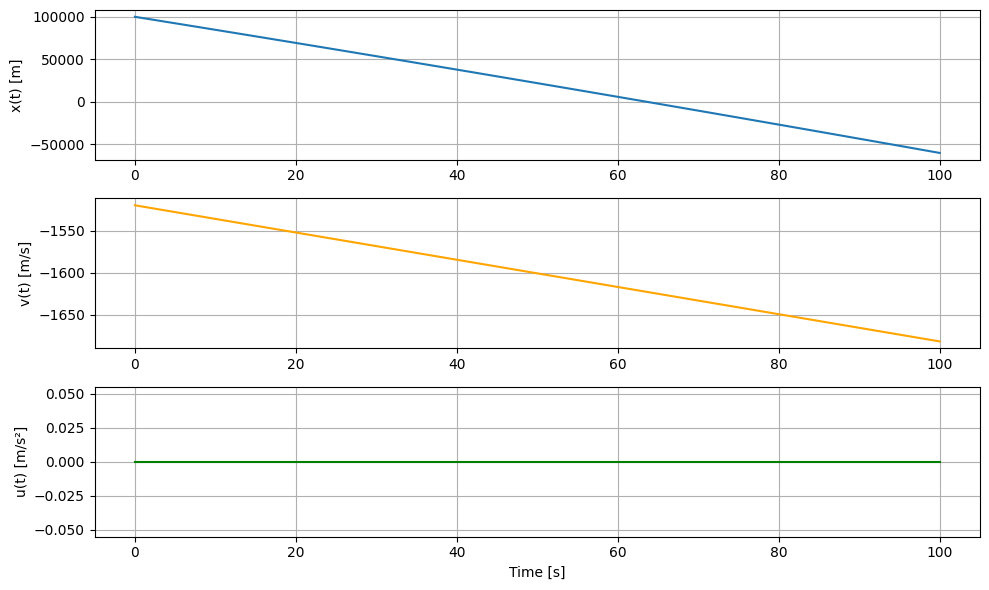

In [ ]:
# Constants
T = 100.0              # Final time
N = 100              # Number of time steps
dt = T / N
umax = u_max          # Max thrust

# Initial and terminal conditions
x0 = h_initial           # Initial height
v0 = - v_initial             # Initial velocity

# Initialize time, state, costate, and control arrays
t = np.linspace(0, T, N+1)
x = np.zeros(N+1)
v = np.zeros(N+1)
u = np.ones(N+1) * g  # Initial guess: hover
lam1 = np.zeros(N+1)
lam2 = np.zeros(N+1)

# Tolerance and iteration parameters
tol = 1e-4
max_iter = 1000

for iteration in range(max_iter):
    # Forward sweep
    x[0] = x0
    v[0] = v0
    for i in range(N):
        x[i+1] = x[i] + dt * v[i]
        v[i+1] = v[i] + dt * (-g + v_exhaust * u[i] / m_total)

    # Backward sweep
    lam1[-1] = 0
    lam2[-1] = 0
    for i in range(N, 0, -1):
        lam1[i-1] = lam1[i] + dt * 0
        lam2[i-1] = lam2[i] + dt * (-lam1[i] + 0)

    # Control update
    u_old = u.copy()
    x_old = x.copy()
    for i in range(N+1):
        u[i] = np.clip(- (v_exhaust / m_total) * lam2[i], 0, umax)

    # Convergence check
    if (np.linalg.norm(u - u_old, np.inf) < tol):
        print(f'Converged in {iteration+1} iterations.')
        break
else:
    print('Did not converge.')

# Plot results
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t, x, label='Position')
plt.ylabel('x(t) [m]')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, v, label='Velocity', color='orange')
plt.ylabel('v(t) [m/s]')
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, u, label='Thrust', color='green')
plt.ylabel('u(t) [m/s²]')
plt.xlabel('Time [s]')
plt.grid()

plt.tight_layout()
plt.show()

### Improvisations

1. Euler to RK4
1. Mass changes bcoz fuel keeps changing.
1. Boundary Conditions - Using Shooting Method
1. Method than FBSM?

🔴 Disadvantages of Forward-Backward Sweep Method (FBSM)

1.	May fail to converge if the problem is highly nonlinear or the initial guess is poor.
2. Sensitive to initial control guess, which can trap the solution in local minima or diverge.
1. Requires Knowledge of Co-state Equations: Solving PMP-based problems requires deriving and solving the adjoint (co-state) equations, which can be analytically and numerically challenging.
1. Iterative and Computationally Intensive: The method requires multiple forward and backward integrations per iteration, which can be costly for complex or high-dimensional systems.
1. No Global Optimality Guarantee: Being a gradient-based method, it can converge to local minima, unlike some global optimization techniques.
1. Discretization Dependency: The accuracy of the solution depends heavily on how finely the time domain is discretized.

📌 Method Names

	•	Forward-Backward Sweep Method (FBSM)
	•	Shooting Method
	•	Direct Methods (e.g., collocation, direct transcription)
	•	Dynamic Programming

📌 Python Libraries

	•	GEKKO
	•	Pyomo
	•	Ozone
	•	CasADi

| Feature                     | **Forward-Backward Sweep Method (FBSM)** | **Shooting Method**         | **Direct Methods** (e.g., collocation) | **Dynamic Programming**       |
|-----------------------------|------------------------------------------|------------------------------|----------------------------------------|-------------------------------|
| **Type**                    | Indirect                                 | Indirect                     | Direct                                 | Global (recursive)            |
| **Main Idea**               | Iteratively solve state & co-state ODEs  | Solve BVP via IVP guessing   | Discretize & solve as NLP               | Solve Bellman’s equation      |
| **Convergence**             | May be unstable; sensitive to guess      | Highly sensitive to guess    | Generally robust                       | Guaranteed (but slow)         |
| **Ease of Implementation** | Moderate                                 | Hard for large systems       | Easier with tools (e.g., CasADi, IPOPT)| Complex for large systems     |
| **Constraint Handling**     | Difficult (needs modification)           | Poor                         | Very good                              | Limited without reformulation |
| **Global Optimality**       | ❌ No                                     | ❌ No                         | ❌ No (unless globally solved)         | ✅ Yes (theoretically)         |
| **Best Use Case**           | Medium-sized, smooth problems            | Small-scale, simple dynamics | Complex problems with constraints       | Low-dimensional, discrete     |

# Thank You!

🙏 Questions and Discussion

📧 dbhanuprakash233@gmail.com

📧 https://dbhanuprakash233.github.io